In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
#from helpers.CorrelationFunction import projected_correlation
from notebook_load_functions import *

In [2]:
plt.rcdefaults()
%matplotlib inline
plt.rcParams['font.size'] = 16.0
plt.rcParams['font.family'] = 'serif'

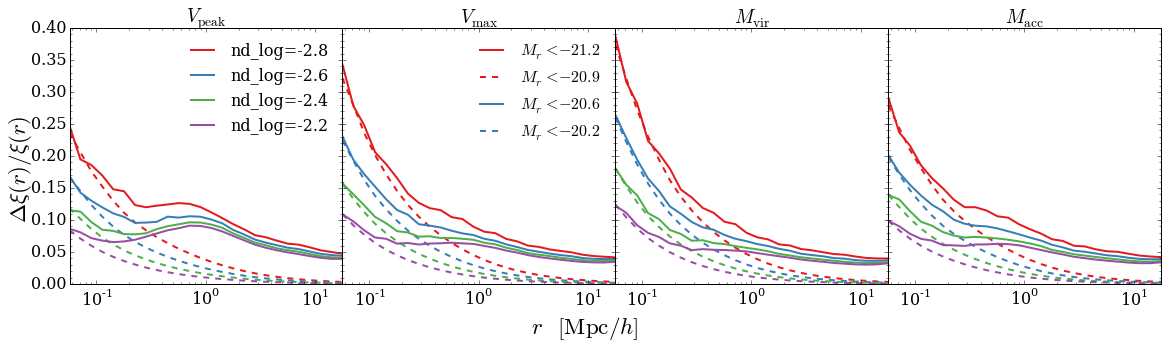

In [3]:
from palettable.colorbrewer.qualitative import Set1_4
def get_color(i):
    return Set1_4.mpl_colors[i]

rbins = np.logspace(-1.3, 1.3, 27)
x = 0.5*(rbins[1:] + rbins[:-1])
proxies = ['vpeak', 'vmax', 'mvir','macc']
nd_log_list_this = (-2.8, -2.6,-2.4, -2.2)
box_size = 125.
case = 'MDhigh'
if case=='darksky': 
    proxies = ['vpeak', 'vmax', 'mvir']

fig, axarr = plt.subplots(ncols=len(proxies), nrows=1, figsize=(4*len(proxies), 4.5), sharex=True, sharey=True)

for i, (ax, proxy) in enumerate(zip(axarr, proxies)):
    for j, nd_log in enumerate(nd_log_list_this):
        samples = load_projected_samples(proxy, nd_log, box_size, case)
        y = np.std(samples, axis=0)/ np.mean(samples, axis=0)
        y_poisson = 1./np.sqrt(np.mean(samples, axis=0))
        ax.semilogx(x, y, c = get_color(j) , lw=2, label='nd_log={}'.format(nd_log))
        ax.semilogx(x, y_poisson, c = get_color(j) , lw=2,ls='--')
        
        # change bins
        #samples1 = np.sum(samples.reshape((len(samples),-1,2)), axis=-1)
        #x_1 = rbins[1::2]
        #y_1 = np.std(samples1, axis=0)/ np.mean(samples1, axis=0)
        #ax.semilogx(x_1, y_1, c = get_color(j), lw=2, ls='-.')
        
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(0,0.4)
    ax.minorticks_on()
    ax.set_title(r'${0}_{{\rm {1}}}$'.format(proxy[0].upper(), proxy[1:]));
    if not i: ax.legend(loc='best', frameon=False, ncol=1, fontsize='medium');
    if i==1: ax.legend(['$M_r < {:.1f}$'.format(af.match(10.0**nd_log)) 
                        for nd_log in nd_log_list_this],loc='best', frameon=False, ncol=1, fontsize='medium')
        
plt.tight_layout(0, rect=(0.02, 0.07, 1.0, 1.0));
fig.text(0.01, 0.5, r'$\Delta \xi(r)/ \xi(r)$', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.5, 0.01, r'$r \; [{\rm Mpc}/h]$', ha='center', va='center', fontsize='x-large');
#plt.savefig('plots/multidark_sample_variance_333.png')

vpeak 512
vmax 468
mvir 512
macc 512


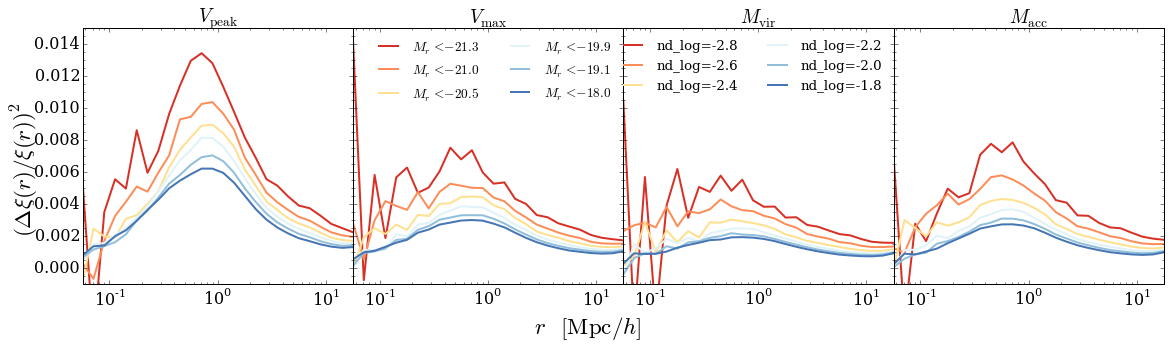

In [6]:
#Individual box
from palettable.colorbrewer.diverging import RdYlBu_6
def get_color(i):
    return RdYlBu_6.mpl_colors[i]


x = 0.5*(rbins[1:] + rbins[:-1])
proxies = ['vpeak', 'vmax', 'mvir', 'macc']
#proxies = ['vpeak', 'vmax', 'mvir']
nd_log_list_this = (-2.8, -2.6,-2.4,-2.2,-2.0,-1.8)
case = 'MDhigh'
box_size = 125.
 
fig, axarr = plt.subplots(ncols=len(proxies), nrows=1, figsize=(4*len(proxies), 4.5), sharex=True, sharey=True)

for i, (ax, proxy) in enumerate(zip(axarr, proxies)):
    for j, nd_log in enumerate(nd_log_list_this):
        samples = load_projected_samples(proxy, nd_log, box_size, case)
        y = np.std(samples, axis=0)/ np.mean(samples, axis=0)
        y_poisson = 1/np.sqrt(np.mean(samples, axis=0))
        ax.semilogx(x, y**2 - y_poisson**2, c = get_color(j) , lw=2, label='nd_log={}'.format(nd_log))
    print proxy, len(samples)
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(-0.001,0.015)
    ax.minorticks_on()
    ax.set_title(r'${0}_{{\rm {1}}}$'.format(proxy[0].upper(), proxy[1:]));
    if i==2: ax.legend(loc='best', frameon=False, ncol=2, fontsize='small');
    if i==1: ax.legend(['$M_r < {:.1f}$'.format(af.match(10.0**nd_log)) 
                        for nd_log in nd_log_list_this],loc='best', frameon=False, ncol=2, fontsize='small')
        
plt.tight_layout(0, rect=(0.02, 0.07, 1.0, 1.0));
fig.text(0.01, 0.5, r'$(\Delta \xi(r)/ \xi(r))^2$', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.5, 0.01, r'$r \; [{\rm Mpc}/h]$', ha='center', va='center', fontsize='x-large');
#plt.savefig('plots/multidarklowres_z3_subtract_poisson_125.png')

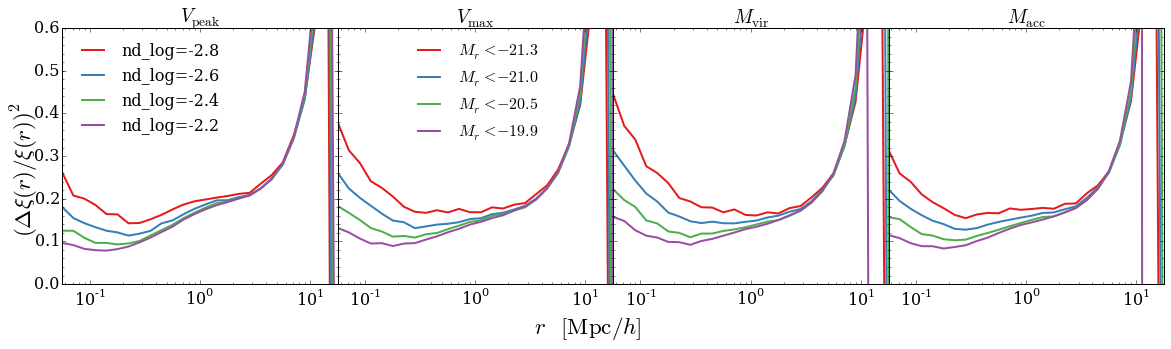

In [15]:
from palettable.colorbrewer.qualitative import Set1_4
def get_color(i):
    return Set1_4.mpl_colors[i]

rbins = np.logspace(-1.3, 1.3, 27)
x = 0.5*(rbins[1:] + rbins[:-1])
proxies = ['vpeak', 'vmax', 'mvir','macc']
nd_log_list_this = (-2.8, -2.6,-2.4, -2.2)
box_size = 125.
case = 'MDhigh'
if case=='darksky': 
    proxies = ['vpeak', 'vmax', 'mvir']

fig, axarr = plt.subplots(ncols=len(proxies), nrows=1, figsize=(4*len(proxies), 4.5), sharex=True, sharey=True)

for i, (ax, proxy) in enumerate(zip(axarr, proxies)):
    for j, nd_log in enumerate(nd_log_list_this):
        samples = load_projected_samples(proxy, nd_log, box_size, case)
        
        Nh = 10**nd_log*box_size**3
        Npairs = Nh*(Nh-1)/2.
        zmax = 40.
        pairs_rand = 0.5*float(Nh*Nh) / box_size**3 * (rbins[1:]**2-rbins[:-1]**2)*np.pi*zmax*2.0
        pairs_rand_3D = 0.5*np.ediff1d(4./3.*np.pi*rbins**3)/box_size**3 * Npairs
        
        
        #y = np.std(samples, axis=0)/ (np.mean(samples, axis=0))
        y = np.std(samples, axis=0)/ (np.mean(samples, axis=0) - pairs_rand)
        #y = np.mean(samples, axis=0)/ pairs_rand
        #y_poisson = 1./np.sqrt(np.mean(samples, axis=0))
        ax.semilogx(x, y, c = get_color(j) , lw=2, label='nd_log={}'.format(nd_log))
        #ax.semilogx(x, y_poisson, c = get_color(j) , lw=2,ls='--')
        
        # change bins
        #samples1 = np.sum(samples.reshape((len(samples),-1,2)), axis=-1)
        #x_1 = rbins[1::2]
        #y_1 = np.std(samples1, axis=0)/ np.mean(samples1, axis=0)
        #ax.semilogx(x_1, y_1, c = get_color(j), lw=2, ls='-.')
        
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(-0.0,0.6)
    ax.minorticks_on()
    ax.set_title(r'${0}_{{\rm {1}}}$'.format(proxy[0].upper(), proxy[1:]));
    if not i: ax.legend(loc='best', frameon=False, ncol=1, fontsize='medium');
    if i==1: ax.legend(['$M_r < {:.1f}$'.format(af.match(10.0**nd_log)) 
                        for nd_log in nd_log_list_this],loc='best', frameon=False, ncol=1, fontsize='medium')
        
plt.tight_layout(0, rect=(0.02, 0.07, 1.0, 1.0));
fig.text(0.01, 0.5, r'$(\Delta \xi(r)/ \xi(r))^2$', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.5, 0.01, r'$r \; [{\rm Mpc}/h]$', ha='center', va='center', fontsize='x-large');
#plt.savefig('plots/multidark_sample_variance_333.png')

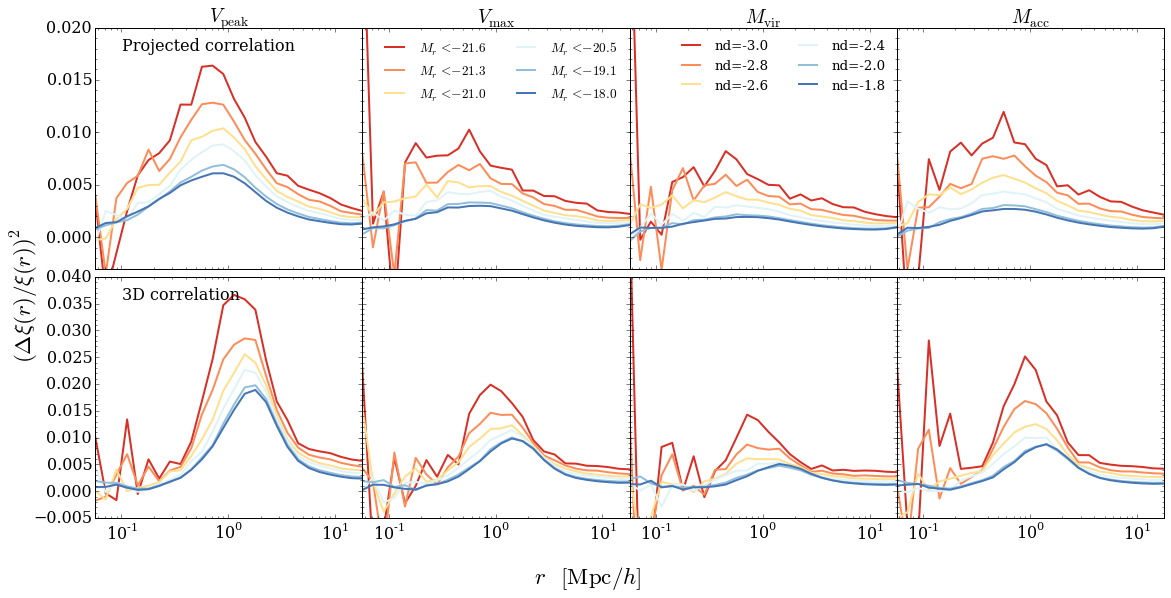

In [79]:
#def ylim(box_size, case):
#    return 10.**(-1.25*np.log10(box_size) + 1.85)

x = 0.5*(rbins[1:] + rbins[:-1])
case = 'MDhigh'
functions = (load_projected_samples, load_samples)
legend_dict = {0:'Projected correlation', 1: '3D correlation'}
proxies = ['vpeak', 'vmax', 'mvir', 'macc']
nd_log_list_this = ( -3.0, -2.8, -2.6,-2.4,-2.0, -1.8,)
box_size = 125.
    
fig, axmat = plt.subplots(ncols=len(proxies), nrows=len(functions), figsize=(4*len(proxies), 4*len(functions)), sharex=True, sharey='row')

for k , (axarr, func) in enumerate(zip(axmat, functions)):
    for i, (ax, proxy) in enumerate(zip(axarr, proxies)): 
        for j, nd_log in enumerate(nd_log_list_this):
            samples = func(proxy, nd_log, box_size, case)
            Nmean = np.mean(samples, axis=0)
            y = np.std(samples, axis=0)/ Nmean
            
            Nh = 10**nd_log*box_size**3
            Npairs = Nh*(Nh-1)/2.
            poisson_correction = np.sqrt(1.-Nmean/Npairs)
            y_poisson = 1/np.sqrt(Nmean)*poisson_correction
            ax.semilogx(x, y**2 - y_poisson**2, c = get_color(j) , lw=2, label='nd={}'.format(nd_log))
            #ax.semilogx(x, y - y_poisson, c = get_color(j) , lw=2, label='nd_log={}'.format(nd_log))
        ax.set_xlim(x[0], x[-1])
        if k==0: ax.set_ylim(-0.003,0.02)
        if k==1: ax.set_ylim(-0.005,0.04)
        #ax.set_ylim(-0.2*ylim(box_size, case),ylim(box_size, case))
        ax.minorticks_on()
        if k==0: ax.set_title(r'${0}_{{\rm {1}}}$'.format(proxy[0].upper(), proxy[1:]));
        if k==0 and i==2: ax.legend(loc='best', frameon=False, ncol=2, fontsize='small');
        if k==0 and i==1: ax.legend(['$M_r < {:.1f}$'.format(af.match(10.0**nd_log)) 
                            for nd_log in nd_log_list_this],loc='best', frameon=False, ncol=2, fontsize='small')
        if i==0: ax.text(0.1, 0.96,'{}'.format(legend_dict[k]) , transform=ax.transAxes, va='top')
        
plt.tight_layout(0, rect=(0.02, 0.07, 1.0, 1.0));
fig.text(0.01, 0.5, r'$(\Delta \xi(r)/ \xi(r))^2$', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.5, 0.01, r'$r \; [{\rm Mpc}/h]$', ha='center', va='center', fontsize='x-large');
plt.savefig('plots/projected_vs_3D_subtract_poisson.png')

In [ ]:
case = 'MDhigh'
box_size = 125.
proxy = 'mvir'
nd_log = -2.5
test = np.mean(load_projected_samples(proxy, nd_log, box_size, case), axis=0)
rand = count_random_pairs(nd_log, box_size)
x = 0.5*(rbins[1:] + rbins[:-1])
plt.loglog(x, test/rand)
plt.hlines(1., x[0],x[-1])
plt.xlabel('r')
plt.ylabel(r'$\xi(r)$')

## r scale where minimum Poisson error = sample variance

In [25]:
rbins = np.logspace(-1.3, 1.3, 27)
test = projected_correlation(halos_small, rbins, 40, 200)


In [42]:
halos_small['z'] = halos_small['z'] + halos_small['vz']/100.

In [43]:
halos_small['z']

array([ 106.16643,  106.49535,   99.73781, ...,   -1.59046,  153.81167,
        133.48208])

In [45]:
halos_small['z']

array([ 104.71943,  104.72885,  104.69221, ...,    0.17264,  160.09947,
        133.97498])